# Load Fashion-MNIST Dataset


Data Shape: (70000, 784)
Labels Shape: (70000,)


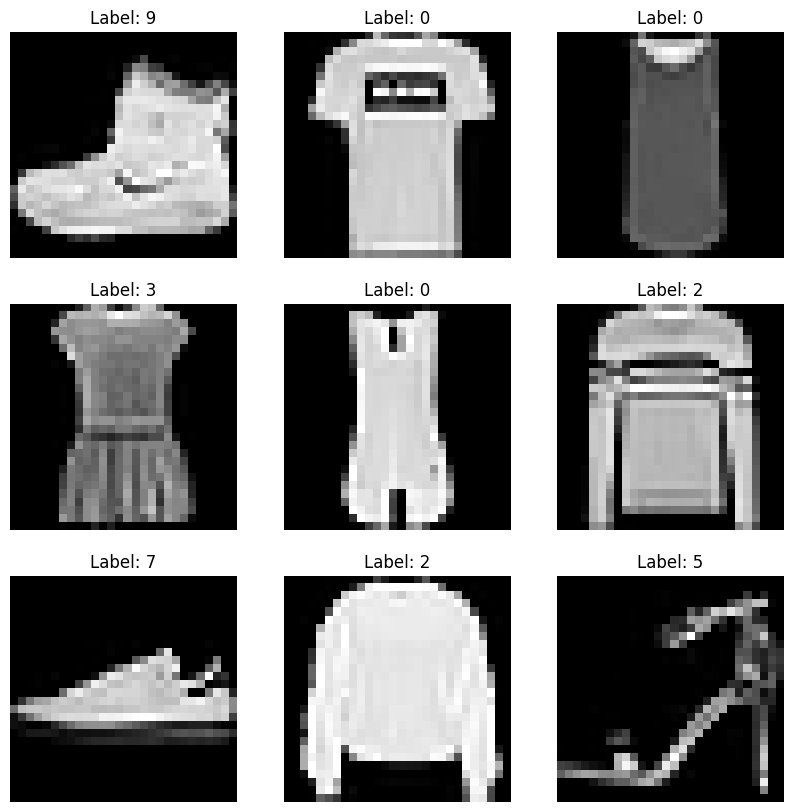

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = fetch_openml(name="Fashion-MNIST", version=1, as_frame=False)

X, y = fashion_mnist.data, fashion_mnist.target

y = y.astype(int)

print(f"Data Shape: {X.shape}")
print(f"Labels Shape: {y.shape}")

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()


# Preprocessing

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib


X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")
joblib.dump(scaler, 'scaler.pkl')



Training Data Shape: (56000, 784)
Test Data Shape: (14000, 784)


['scaler.pkl']

# Random Forest Model


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.88
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1394
           1       0.99      0.96      0.98      1402
           2       0.79      0.82      0.81      1407
           3       0.88      0.92      0.90      1449
           4       0.77      0.84      0.81      1357
           5       0.97      0.96      0.96      1449
           6       0.74      0.59      0.66      1407
           7       0.93      0.94      0.94      1359
           8       0.96      0.98      0.97      1342
           9       0.95      0.96      0.95      1434

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000



# Hyperparameter Tuning for random forest

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# تعريف قيم المعلمات العشوائية
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10)
}

# تعريف RandomizedSearchCV
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # عدد التركيبات العشوائية التي سيتم تجربتها
    cv=3,
    verbose=2,
    random_state=42
)

# تدريب النموذج
random_search.fit(X_train, y_train)

# أفضل معلمات بعد العشوائي
best_model = random_search.best_estimator_
y_pred_rf_best = best_model.predict(X_test)
print("Best Parameters for Random Forest:", random_search.best_params_)
print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf_best):.2f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, min_samples_split=5, n_estimators=142; total time= 1.4min
[CV] END max_depth=20, min_samples_split=5, n_estimators=142; total time= 1.3min
[CV] END max_depth=20, min_samples_split=5, n_estimators=142; total time= 1.2min
[CV] END max_depth=20, min_samples_split=4, n_estimators=121; total time= 1.0min
[CV] END max_depth=20, min_samples_split=4, n_estimators=121; total time= 1.0min
[CV] END max_depth=20, min_samples_split=4, n_estimators=121; total time= 1.0min
[CV] END max_depth=None, min_samples_split=6, n_estimators=152; total time= 2.0min
[CV] END max_depth=None, min_samples_split=6, n_estimators=152; total time= 2.2min
[CV] END max_depth=None, min_samples_split=6, n_estimators=152; total time= 2.2min
[CV] END max_depth=10, min_samples_split=4, n_estimators=124; total time=  59.4s
[CV] END max_depth=10, min_samples_split=4, n_estimators=124; total time=  59.0s
[CV] END max_depth=10, min_samples_split=4

# Logistic Regression Model


In [5]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.85
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1394
           1       0.96      0.97      0.96      1402
           2       0.75      0.74      0.75      1407
           3       0.85      0.86      0.86      1449
           4       0.74      0.78      0.76      1357
           5       0.93      0.93      0.93      1449
           6       0.64      0.58      0.61      1407
           7       0.90      0.94      0.92      1359
           8       0.93      0.93      0.93      1342
           9       0.96      0.94      0.95      1434

    accuracy                           0.85     14000
   macro avg       0.85      0.85      0.85     14000
weighted avg       0.85      0.85      0.85     14000



D:\ana\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Hyperparameter Tuning for logestic regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import RandomizedSearchCV

X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

param_dist_lr = {
    'penalty': ['l2'],
    'C': [0.1, 1],
    'solver': ['liblinear']  
}

random_search_lr = RandomizedSearchCV(
    LogisticRegression(random_state=42, max_iter=500), 
    param_distributions=param_dist_lr,
    n_iter=3,  
    cv=2,      
    verbose=1,
    random_state=42
)

random_search_lr.fit(X_train_small, y_train_small)

best_lr_model = random_search_lr.best_estimator_
y_pred_lr_best = best_lr_model.predict(X_test)

print("Best Parameters for Logistic Regression:", random_search_lr.best_params_)
print(f"Tuned Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr_best):.2f}")


C:\Users\seife\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best Parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
Tuned Logistic Regression Accuracy: 0.83


# SVM Model


In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.89
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1394
           1       1.00      0.97      0.98      1402
           2       0.83      0.82      0.83      1407
           3       0.88      0.91      0.89      1449
           4       0.81      0.84      0.82      1357
           5       0.97      0.96      0.96      1449
           6       0.74      0.66      0.70      1407
           7       0.93      0.96      0.95      1359
           8       0.94      0.98      0.96      1342
           9       0.97      0.95      0.96      1434

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000



In [11]:
from sklearn.metrics import classification_report
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1394
           1       1.00      0.97      0.98      1402
           2       0.83      0.82      0.83      1407
           3       0.88      0.91      0.89      1449
           4       0.81      0.84      0.82      1357
           5       0.97      0.96      0.96      1449
           6       0.74      0.66      0.70      1407
           7       0.93      0.96      0.95      1359
           8       0.94      0.98      0.96      1342
           9       0.97      0.95      0.96      1434

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.89     14000
weighted avg       0.89      0.89      0.89     14000



# Hyperparameter Tuning for svm

In [4]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

param_dist_svm = {
    'C': [5, 10, 15, 20],  
    'kernel': ['rbf', 'poly'], 
    'gamma': ['scale']           
}


random_search_svm = RandomizedSearchCV(
    SVC(random_state=42),
    param_distributions=param_dist_svm,
    n_iter=5,  
    cv=2,     
    verbose=1,
    random_state=42
)

random_search_svm.fit(X_train_small, y_train_small)

best_svm_model = random_search_svm.best_estimator_
y_pred_svm_best = best_svm_model.predict(X_test)

print("Best Parameters for SVM:", random_search_svm.best_params_)
print(f"Tuned SVM Accuracy: {accuracy_score(y_test, y_pred_svm_best):.2f}")


Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best Parameters for SVM: {'kernel': 'rbf', 'gamma': 'scale', 'C': 5}
Tuned SVM Accuracy: 0.88


# save best model

In [12]:
import joblib
joblib.dump(svm_model, 'svm_model.pkl')
print("Model saved as 'svm_model.pkl'")



Model saved as 'svm_model.pkl'
